### Setup

In [1]:
import pandas as pd
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt


filename = 'C:/Users/endwy/Documents/Columbia MSBA/Spring 2019/E4524 - Analytics in Practice/Data/Csv/a_test.csv'
df = pd.read_csv(filename, header=0)
df=df.drop(columns=('Unnamed: 0'))
df.head(2)

,Treated,Repulls,Mortalities,Treatment Success(%),Case Fatality Rate(%),Treatment $,Month,Risk,Season
0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [2]:
df['Treatment $'] = np.log1p(df['Treatment $'])

In [3]:
train, test = train_test_split(df, test_size = 0.25,random_state=1)
x_train = train.drop(['Treatment $'],axis=1)
y_train = train['Treatment $']
x_test = test.drop(['Treatment $'],axis=1)
y_test = test['Treatment $']

In [4]:
x_test.shape

(948, 8)

### XGBoost Model

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [6]:
#RandomizedSearch for best patameters
clf = xgb.XGBRegressor(objective ='reg:linear')

param_grid = {
        'max_depth': [5, 8, 10, 15],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'alpha': [0, 0.5, 1.0, 5, 10],
        'n_estimators': [10,20,30,40,50]}


rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=5,
                            refit=False, random_state=42)
print("Randomized search..")
rs_clf.fit(x_train, y_train)

Randomized search..
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future

[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 
[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.1s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learnin

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.0s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [5, 8, 10, 15], 'learning_rate': [0.001, 0.01, 0.1, 0.2], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'alpha': [0, 0.5, 1.0, 5, 10], 'n_estimators': [10, 20, 30, 40, 50]},
          pre_dispatch='2*n_jobs', random_state=42, refit=False,
          return_train_score='warn', scoring=None, verbose=2)

In [20]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 3, alpha = 1, n_estimators = 100)

In [21]:
xg_reg.fit(x_train,y_train)
preds_model = xg_reg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [22]:
rmse = math.sqrt(mean_squared_error(y_test, preds_model))
print("RMSE: %f" % (rmse))

RMSE: 1.493663


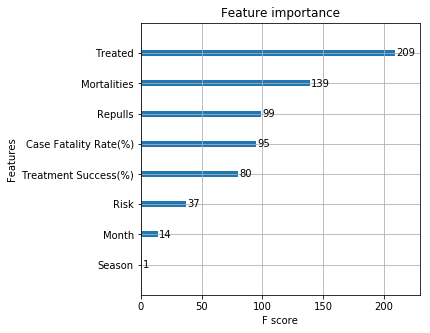

In [23]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [11]:
df.corr()

,Treated,Repulls,Mortalities,Treatment Success(%),Case Fatality Rate(%),Treatment $,Month,Risk,Season
Treated,1.000000,0.845929,0.074353,0.341895,0.052386,0.516952,-0.019081,-0.053330,0.028961
Repulls,0.845929,1.000000,0.004627,0.295117,0.063026,0.501117,0.000863,-0.007223,0.040936
Mortalities,0.074353,0.004627,1.000000,0.042227,0.015692,0.074002,-0.020648,0.016453,0.011318
Treatment Success(%),0.341895,0.295117,0.042227,1.000000,0.615644,0.721306,0.003531,-0.158371,0.029291
Case Fatality Rate(%),0.052386,0.063026,0.015692,0.615644,1.000000,0.283871,-0.016108,-0.086069,0.005961
Treatment $,0.516952,0.501117,0.074002,0.721306,0.283871,1.000000,-0.000045,-0.106751,0.035952
Month,-0.019081,0.000863,-0.020648,0.003531,-0.016108,-0.000045,1.000000,-0.010778,0.430821
Risk,-0.053330,-0.007223,0.016453,-0.158371,-0.086069,-0.106751,-0.010778,1.000000,-0.010501
Season,0.028961,0.040936,0.011318,0.029291,0.005961,0.035952,0.430821,-0.010501,1.000000


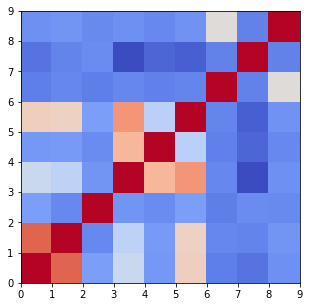

In [12]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()